# Webscraping

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
driver = webdriver.Chrome() 

In [3]:
base_url = "https://books.toscrape.com/catalogue/page-{}.html"

In [4]:
#loop through the pages
for p in range(1, 51):
    url = f'https://books.toscrape.com/catalogue/page-{p}.html'

In [5]:
driver.get(url)

In [6]:
time.sleep(5)

In [7]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [8]:
books_find = soup.find_all('article', class_='product_pod')

In [9]:
books = []
for book in books_find:
    title = book.h3.a['title']

    price = book.find('p', class_='price_color')
    price = price.text.strip() if price else 'N/A'

    rating = book.find('p', class_='star-rating')
    rating = rating['class'][1] if rating else 'N/A'  # e.g. "Three"

    availability = book.find('p', class_='instock availability')
    availability = availability.text.strip() if availability else 'N/A'

    link = book.h3.a['href']
    link = 'https://books.toscrape.com/catalogue/' + link
    
    books.append({
        'Title': title,
        'Price': price,
        'Rating': rating,
        'Availability': availability,
        'Link': link
        })

In [10]:
df = pd.DataFrame(books)
df.shape

(20, 5)

In [11]:
driver.quit()

In [12]:
df.head(20)

,Title,Price,Rating,Availability,Link
0,Frankenstein,£38.00,Two,In stock,https://books.toscrape.com/catalogue/frankenst...
1,Forever Rockers (The Rocker #12),£28.80,Three,In stock,https://books.toscrape.com/catalogue/forever-r...
2,Fighting Fate (Fighting #6),£39.24,Three,In stock,https://books.toscrape.com/catalogue/fighting-...
3,Emma,£32.93,Two,In stock,https://books.toscrape.com/catalogue/emma_17/i...
4,"Eat, Pray, Love",£51.32,Three,In stock,https://books.toscrape.com/catalogue/eat-pray-...
5,Deep Under (Walker Security #1),£47.09,Five,In stock,https://books.toscrape.com/catalogue/deep-unde...
6,Choosing Our Religion: The Spiritual Lives of ...,£28.42,Four,In stock,https://books.toscrape.com/catalogue/choosing-...
7,Charlie and the Chocolate Factory (Charlie Buc...,£22.85,Three,In stock,https://books.toscrape.com/catalogue/charlie-a...
8,Charity's Cross (Charles Towne Belles #4),£41.24,One,In stock,https://books.toscrape.com/catalogue/charitys-...
9,Bright Lines,£39.07,Five,In stock,https://books.toscrape.com/catalogue/bright-li...


### Save dataset to csv 

In [13]:
df.to_csv('books_data.csv', index=False)


# EDA

In [14]:
df = pd.read_csv("books_data.csv")

In [15]:
df.shape

(20, 5)

In [16]:
df.columns

Index(['Title', 'Price', 'Rating', 'Availability', 'Link'], dtype='object')

In [17]:
df.dtypes

Title           object
Price           object
Rating          object
Availability    object
Link            object
dtype: object

### Remove the '£' symbol and convert the price variable to float

In [18]:
df['Price'] = df['Price'].replace(r'[£,]', '', regex=True).astype(float)
df

,Title,Price,Rating,Availability,Link
0,Frankenstein,38.00,Two,In stock,https://books.toscrape.com/catalogue/frankenst...
1,Forever Rockers (The Rocker #12),28.80,Three,In stock,https://books.toscrape.com/catalogue/forever-r...
2,Fighting Fate (Fighting #6),39.24,Three,In stock,https://books.toscrape.com/catalogue/fighting-...
3,Emma,32.93,Two,In stock,https://books.toscrape.com/catalogue/emma_17/i...
4,"Eat, Pray, Love",51.32,Three,In stock,https://books.toscrape.com/catalogue/eat-pray-...
5,Deep Under (Walker Security #1),47.09,Five,In stock,https://books.toscrape.com/catalogue/deep-unde...
6,Choosing Our Religion: The Spiritual Lives of ...,28.42,Four,In stock,https://books.toscrape.com/catalogue/choosing-...
7,Charlie and the Chocolate Factory (Charlie Buc...,22.85,Three,In stock,https://books.toscrape.com/catalogue/charlie-a...
8,Charity's Cross (Charles Towne Belles #4),41.24,One,In stock,https://books.toscrape.com/catalogue/charitys-...
9,Bright Lines,39.07,Five,In stock,https://books.toscrape.com/catalogue/bright-li...


In [19]:
df.dtypes

Title            object
Price           float64
Rating           object
Availability     object
Link             object
dtype: object

In [20]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Title           0
Price           0
Rating          0
Availability    0
Link            0
dtype: int64


## Univariate analysis

### Numerical continuous variable, "Price" :

In [21]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print(f"Number of outliers in 'Price': {len(outliers)}")

print("\nOutlier prices:")
print(outliers['Price'].describe())

#  Remove outliers
df_cleaned = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

Number of outliers in 'Price': 0

Outlier prices:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Price, dtype: float64


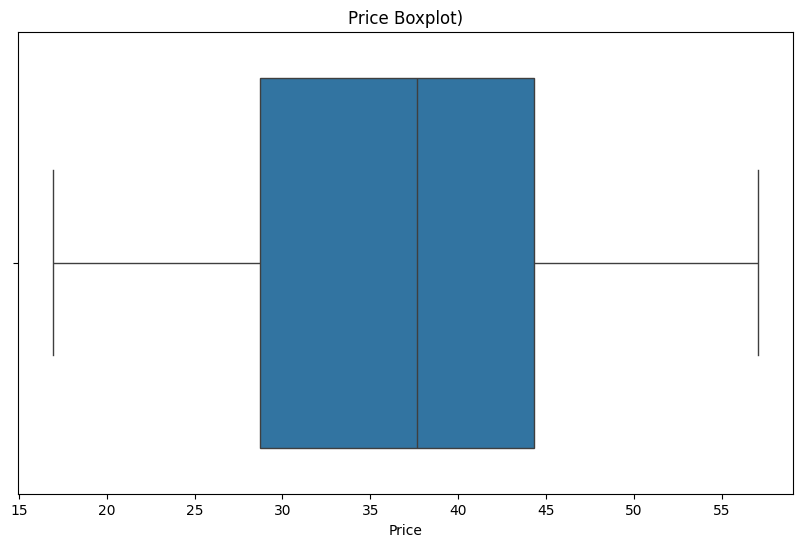

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot)')
plt.xlabel('Price')
plt.show()

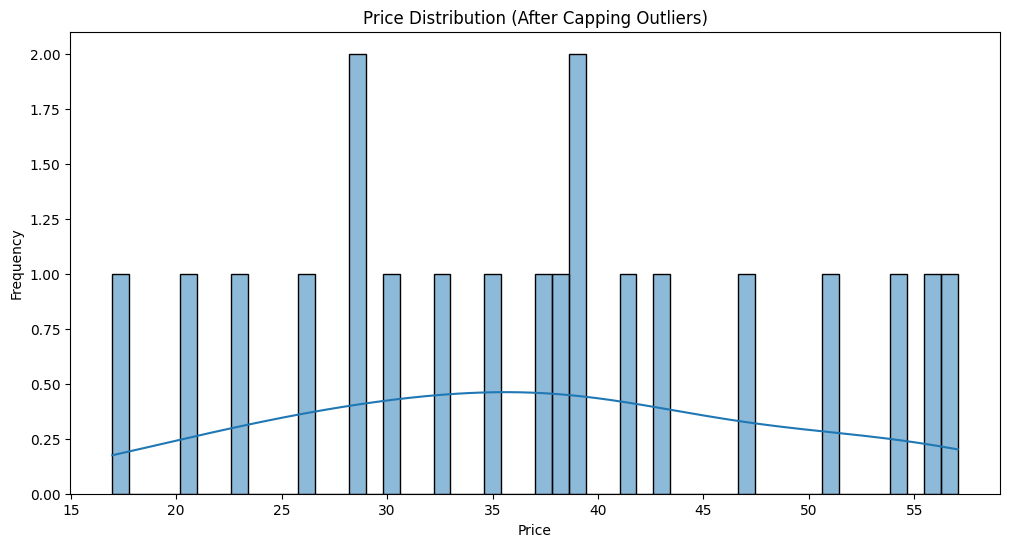

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Price'], bins=50, kde=True)
plt.title('Price Distribution (After Capping Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

### Categorical Variable, "Rating" :

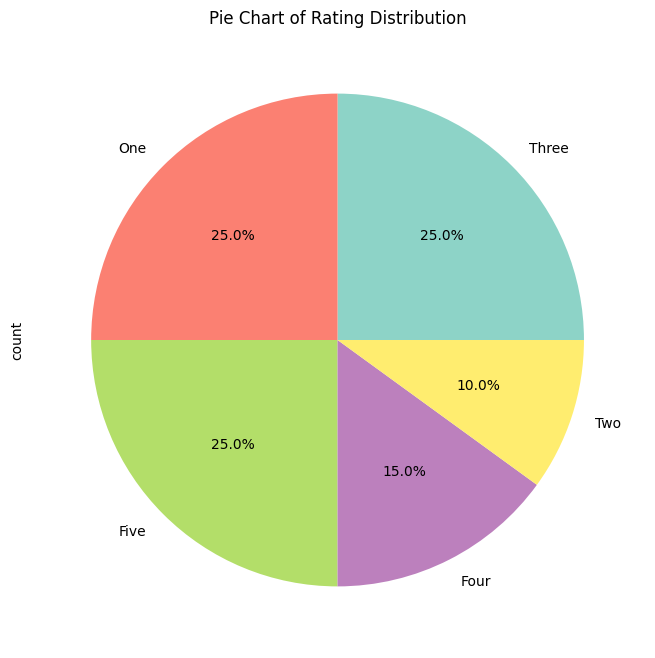

In [ ]:
rating_counts = df['Rating'].value_counts()

plt.figure(figsize=(8, 8))
rating_counts.plot.pie(autopct='%1.1f%%',cmap='Set3')
plt.title('Pie Chart of Rating Distribution')
plt.show()


## Bivariate analysis

### Continuous variable, "price" and categorical variable, "rating" :

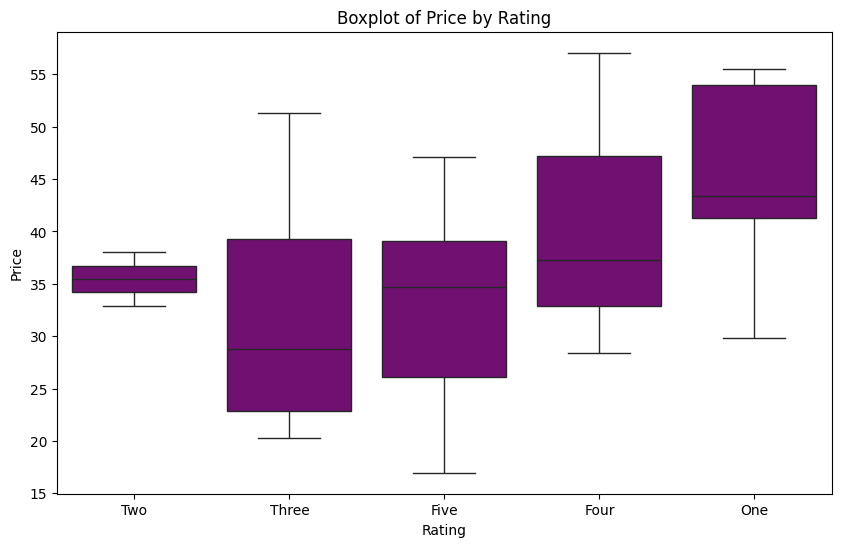

In [25]:
# Boxplot of Price by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rating'], y=df['Price'], color="purple")
plt.title('Boxplot of Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()


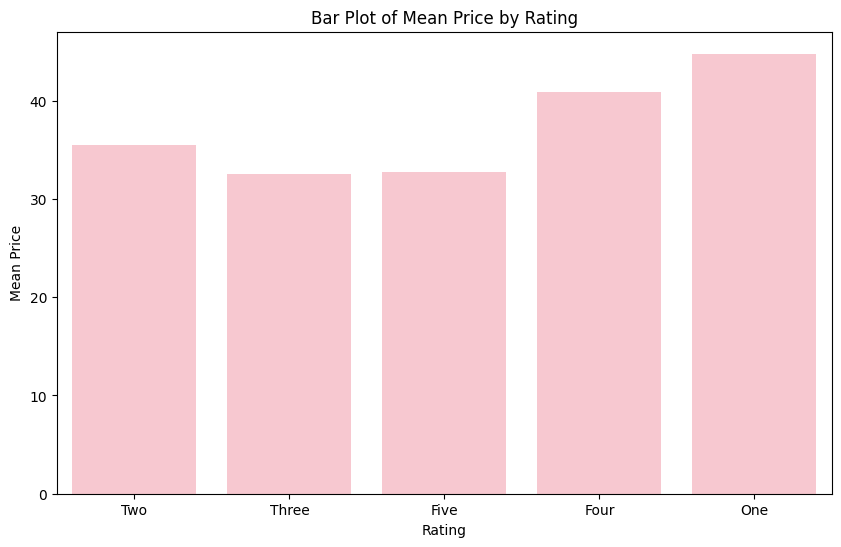

In [26]:
# Bar plot of mean Price per Rating
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Rating'], y=df['Price'], color="pink", errorbar=None)
plt.title('Bar Plot of Mean Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Mean Price')
plt.show()

### Save processed dataset to csv

In [ ]:
df_cleaned.to_csv('processed_books_data.csv', index=False)